In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
import CollisionModule

In [2]:
import cProfile

In [3]:
import torch

In [32]:
r = np.random.rand(100,3)

x = np.linspace(0, 1, 4)
y = np.linspace(0, 1, 4)
z = np.linspace(0, 1, 4)
H, edges = np.histogramdd(r, bins = (x, y, z))
H.shape, edges[0].size, edges[1].size, edges[2].size

print(r)
print(H)
print(H.sum())
print(x)

[[0.53575852 0.04778032 0.54088618]
 [0.94937679 0.16008569 0.94587576]
 [0.30427686 0.22351235 0.28134508]
 [0.39911141 0.89623002 0.62644053]
 [0.44388902 0.09048951 0.63580525]
 [0.79810517 0.37754974 0.14962933]
 [0.73194434 0.23457197 0.6891166 ]
 [0.63193251 0.93858607 0.53127949]
 [0.23462808 0.00714805 0.50126964]
 [0.25516918 0.40720445 0.09994545]
 [0.92456152 0.29106283 0.34524276]
 [0.59078653 0.71272557 0.76445865]
 [0.18638735 0.35705921 0.33273299]
 [0.93156907 0.55543953 0.38781908]
 [0.3425165  0.27083928 0.11936371]
 [0.63125245 0.4575084  0.83401758]
 [0.82604051 0.37953624 0.87910894]
 [0.85778002 0.2276919  0.35246369]
 [0.57417114 0.01564326 0.64852217]
 [0.43916461 0.3366833  0.90295233]
 [0.2051859  0.33794929 0.38928113]
 [0.50344227 0.32431375 0.50081364]
 [0.90848689 0.62193262 0.26785066]
 [0.23648086 0.52755566 0.74690023]
 [0.62434068 0.90377566 0.0691323 ]
 [0.77682939 0.25469472 0.35288734]
 [0.47066804 0.72992137 0.03304841]
 [0.24330934 0.35141337 0.97

In [4]:
release_pos = np.load('./release_pos_2e7_SMD.npy')
velosity_matrix = np.load('./velosity_matrix_2e7_SMD.npy')
DXsec_Al = np.load('./DXsec_Al_1e8.npy')

(20000000, 3)


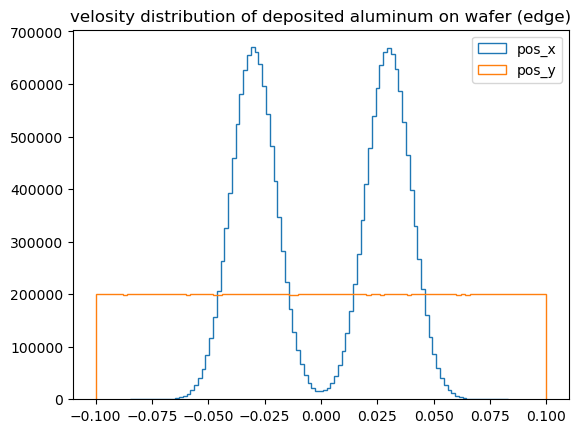

In [5]:
print(release_pos.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(release_pos[:,0], bins=100,histtype='step', stacked=True, fill=False, label='pos_x')
ax.hist(release_pos[:,1], bins=100,histtype='step', stacked=True, fill=False, label='pos_y')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

(20000000, 3)


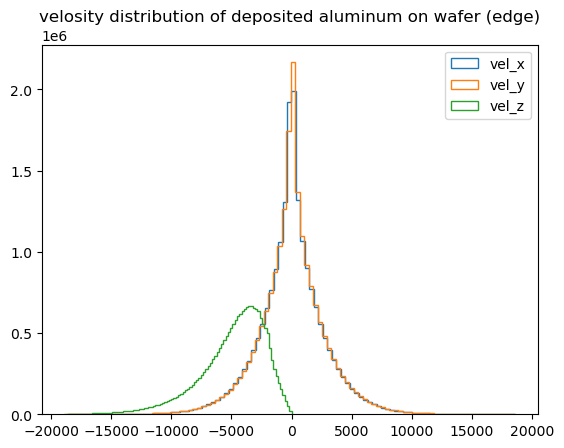

In [6]:
print(velosity_matrix.shape)

fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [7]:
TS = 0.18 #200mm
release_pos[:,2] += TS
print(release_pos[:,0].min())
print(release_pos[:,0].max())
print(release_pos[:,1].min())
print(release_pos[:,1].max())

-0.08481093989588641
0.08300671211430694
-0.09999999559446396
0.09999999927864126


In [8]:
logname = 'DSMC_0708_TS180_collision_ArAl_SMD'
transport = CollisionModule.transport(boundaryType='SMD', maxMove=1, pressure_pa=0.2, timeStep= 1e-7, temperature=300, cellSize=[230, 100, 100], celllength=0.002, chamberSize=[0.23, 0.1], DXsec=DXsec_Al, logname=logname)
transport.setXsec(energy_range=[0.1, 50, 50])

array([0.00000000e+00, 2.88759926e-19, 2.50345501e-19, 2.29729804e-19,
       2.15988267e-19, 2.05836085e-19, 1.97865444e-19, 1.91350115e-19,
       1.85869120e-19, 1.81157876e-19, 1.77039879e-19, 1.73391861e-19,
       1.70124541e-19, 1.67171304e-19, 1.64481213e-19, 1.62014501e-19,
       1.59739561e-19, 1.57630888e-19, 1.55667619e-19, 1.53832483e-19,
       1.52111037e-19, 1.50491083e-19, 1.48962236e-19, 1.47515583e-19,
       1.46143422e-19, 1.44839058e-19, 1.43596631e-19, 1.42410991e-19,
       1.41277587e-19, 1.40192376e-19, 1.39151756e-19, 1.38152501e-19,
       1.37191715e-19, 1.36266785e-19, 1.35375349e-19, 1.34515263e-19,
       1.33684578e-19, 1.32881516e-19, 1.32104448e-19, 1.31351884e-19,
       1.30622454e-19, 1.29914895e-19, 1.29228042e-19, 1.28560820e-19,
       1.27912230e-19, 1.27281348e-19, 1.26667313e-19, 1.26069323e-19,
       1.25486633e-19, 1.24918544e-19])

In [9]:
cProfile.run('result = transport.runE(p0=release_pos, v0=velosity_matrix, time=1e-5)')

running: 100%|██████████████████████████████████████████████████████| 100/100 [45:47<00:00, 27.5s/B]

         232783 function calls (232782 primitive calls) in 2747.340 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1001    0.004    0.000    0.007    0.000 <frozen genericpath>:121(_splitext)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:100(acquire)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1026(__enter__)
        4    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1030(__exit__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1054(_find_spec)
        1    0.000    0.000    0.002    0.002 <frozen importlib._bootstrap>:1120(_find_and_load_unlocked)
        1    0.000    0.000    0.002    0.002 <frozen importlib._bootstrap>:1165(_find_and_load)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1207(_handle_fromlist)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstr

In [9]:
result = transport.runE(p0=release_pos, v0=velosity_matrix, time=5e-4)

running:  29%|███████████████                                     | 29.0/100 [53:31<2:11:02, 111s/B]


In [3]:
result2 = np.load('./transport_TS300_result_posvel.npy')
result1 = np.load('./transport_TS300_result_collisionPos.npy')

In [10]:
depo_count = 0
for i in range(len(result[1])):
    depo_count += result[1][i].shape[0]

depo_arr = np.zeros((depo_count, 6))
pointer = 0
for i in range(len(result[1])):
    depo_arr[pointer:pointer + result[1][i].shape[0]] = result[1][i]
    pointer += result[1][i].shape[0]


In [11]:
collison_count = 0
for i in range(len(result[0])):
    collison_count += result[0][i].shape[0]

collison_arr = np.zeros((collison_count, 3))
pointer = 0
for i in range(len(result[0])):
    collison_arr[pointer:pointer + result[0][i].shape[0]] = result[0][i]
    pointer += result[0][i].shape[0]

In [12]:
print(depo_arr.shape)
print(collison_arr.shape)

(14818025, 6)
(29754208, 3)


In [26]:
print(depo_arr.shape)
print(collison_arr.shape)
np.save('transport_TS60_result_posvel_02Pa_SMD_final0708', depo_arr)
np.save('transport_TS60_result_collisionPos_02Pa_SMD_final0708', collison_arr)

(14247266, 6)
(43712893, 3)


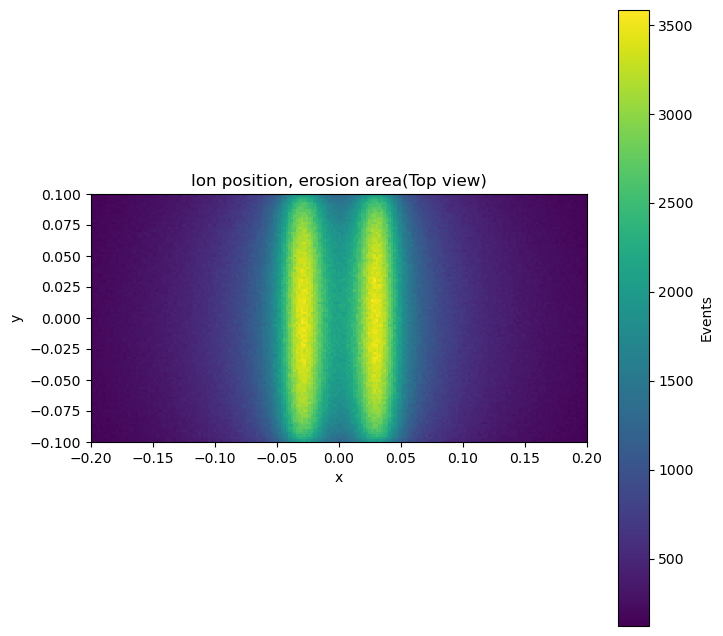

In [13]:
x_erosion_np = collison_arr[:,0]
y_erosion_np = collison_arr[:,1]

xbins = np.linspace(-0.2,0.2,200)
ybins = np.linspace(-0.1,0.1,100)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

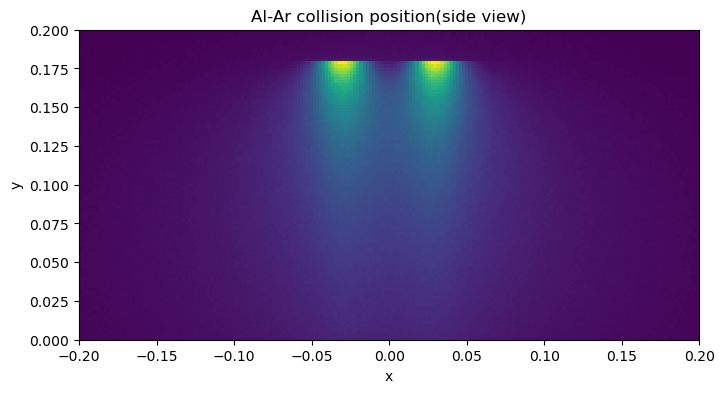

In [14]:
x_erosion_np = collison_arr[:,0]
z_erosion_np = collison_arr[:,2]

xbins = np.linspace(-0.2,0.2,200)
zbins = np.linspace(0,0.2,100)
# zbins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
z_bins = np.histogram(z_erosion_np, bins=zbins)

H, xedges, zedges = np.histogram2d(x_erosion_np, z_erosion_np, bins=(xbins, zbins))

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
ax.set_title('Al-Ar collision position(side view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
# fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [15]:
depo_pv = depo_arr
a = np.array(depo_pv)
print(a.shape)

(14818025, 6)


In [16]:
velosity_matrix.shape

(20000000, 3)

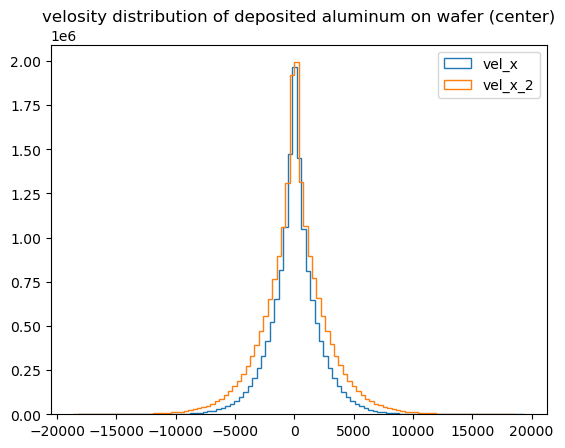

In [17]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(depo_arr[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
# ax.hist(result[2][:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
# ax.hist(result[2][:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')

ax.hist(velosity_matrix[:,0], bins=100,histtype='step', stacked=True, fill=False, label='vel_x_2')
# ax.hist(velosity_matrix[:,1], bins=100,histtype='step', stacked=True, fill=False, label='vel_y_2')
# ax.hist(velosity_matrix[:,2], bins=100,histtype='step', stacked=True, fill=False, label='vel_z_2')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

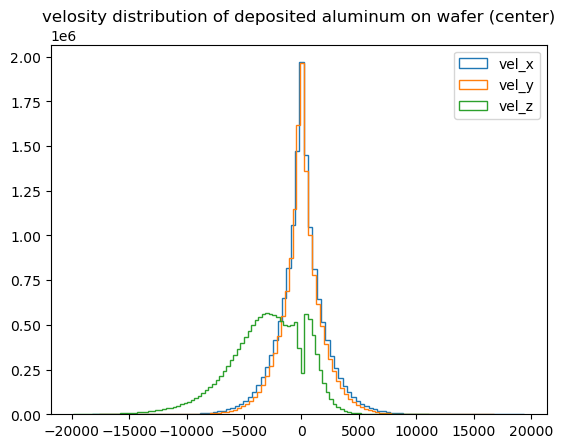

In [18]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(a[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(a[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(a[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

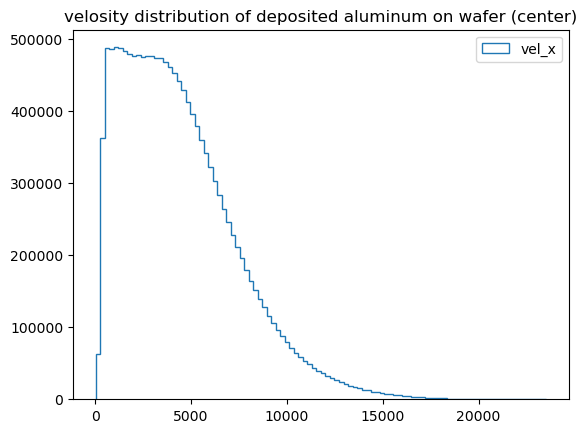

In [19]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(np.linalg.norm(a[:,3:],axis=1), bins=100,histtype='step', stacked=True, fill=False, label='vel_x')

# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

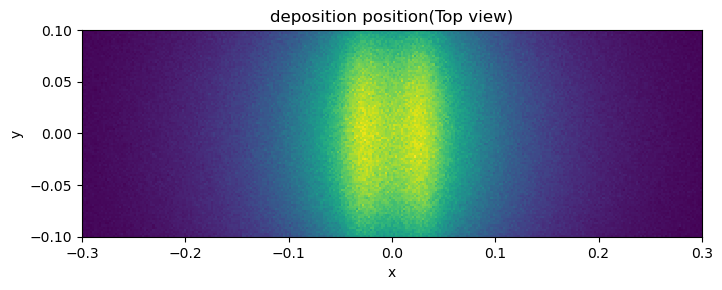

In [20]:
x_erosion_np = a[:,0]
y_erosion_np = a[:,1]

xbins = np.linspace(-0.3,0.3,300)
ybins = np.linspace(-0.1,0.1,100)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('deposition position(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
# fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [21]:
center_indices = np.logical_or(a[:,0] < -0.015, a[:,0] > 0.015)
center_indices |= np.logical_or(a[:,1] < -0.015, a[:,1] > 0.015)
center_indices |= np.array(a[:,2] > 0.1)

if np.any(center_indices):
    center_depo = a[~center_indices]

print(center_depo.shape)

(180107, 6)


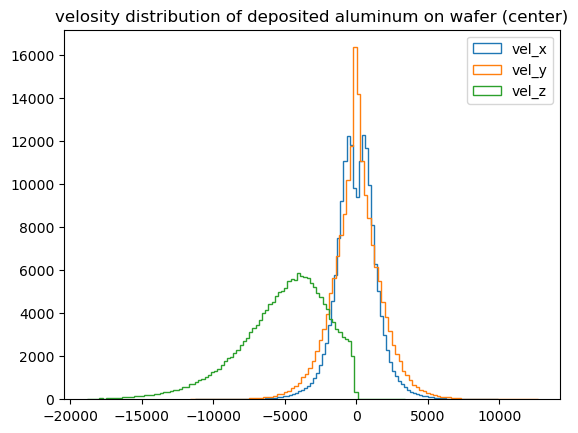

In [22]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (center)")
ax.hist(center_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(center_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(center_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

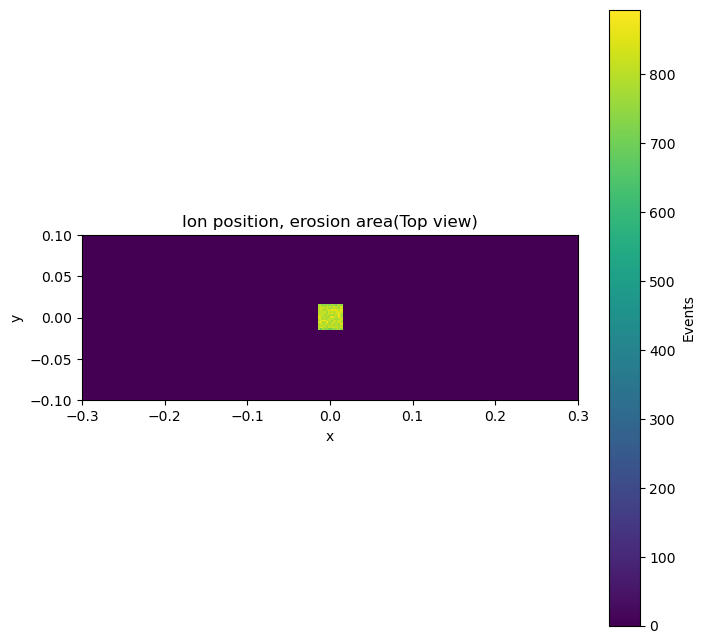

In [23]:
x_erosion_np = center_depo[:,0]
y_erosion_np = center_depo[:,1]

xbins = np.linspace(-0.3,0.3,300)
ybins = np.linspace(-0.1,0.1,100)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [24]:
edge_indices = np.logical_or(a[:,0] < 0.165, a[:,0] > 0.195)
edge_indices |= np.logical_or(a[:,1] < -0.015, a[:,1] > 0.015)
edge_indices |= np.array(a[:,2] > 0.2)
if np.any(edge_indices):
    edge_depo = a[~edge_indices]

print(edge_depo.shape)

(28847, 6)


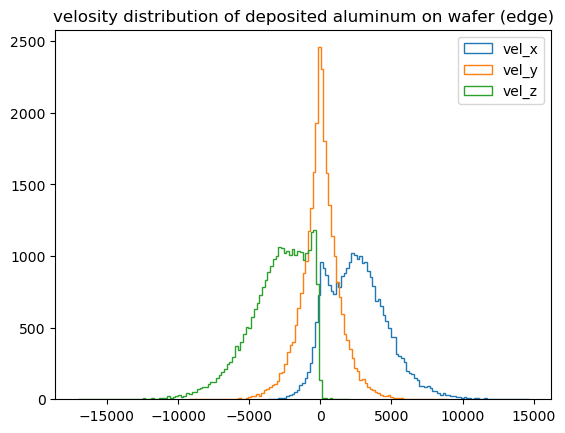

In [25]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

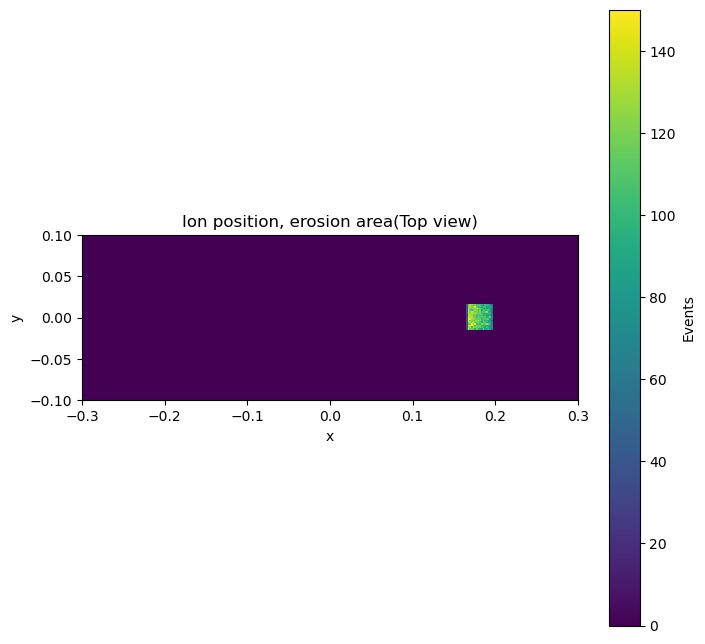

In [28]:
x_erosion_np = edge_depo[:,0]
y_erosion_np = edge_depo[:,1]

xbins = np.linspace(-0.3,0.3,300)
ybins = np.linspace(-0.1,0.1,100)
# ybins = np.linspace(1.815, 2.415, 200)
x_bins = np.histogram(x_erosion_np, bins=xbins)
y_bins = np.histogram(y_erosion_np, bins=ybins)

H, xedges, yedges = np.histogram2d(x_erosion_np, y_erosion_np, bins=(xbins, ybins))


fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(H.T, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_title('Ion position, erosion area(Top view)')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(im, ax=ax, label='Events')
plt.show()

In [13]:
for i in range(1):
    center_depo = np.concatenate((center_depo, center_depo), axis=0)

print(center_depo.shape)

(184988, 6)


In [14]:
import depoSimulator_symmetry

In [15]:
film = np.zeros((88, 88, 120))

bottom = 10
film[:, :, 0:bottom] = 10 # bottom

height = 30
left_side = 24
right_side = 24
film[:, 88-right_side:, 0:height] = 10
film[:, 0:left_side, 0:height] = 10
film[88-right_side:, :, 0:height] = 10
film[0:left_side, :, 0:height] = 10

In [68]:
substrute = torch.Tensor(film==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter()
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=9)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:58128/index.html?ui=P_0x208e70d92d0_9&reconnect=auto" class="pyvis…

In [16]:
print(center_depo[:, 3:].shape)

(184988, 3)


In [17]:
logname = 'TS300'
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = center_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4, logname=logname)
deposit = test.run_afterCollision(1, 125, center_depo[:, 3:], 0.5)

running: 100%|██████████████████████████████████████████████████████| 100/100 [05:15<00:00, 3.15s/B]


In [21]:
np.save('./TScompare/TS300_afterCollision_0530_v2_run1_t1e-5_p4e6', deposit)

In [20]:
depo1 = torch.Tensor(deposit[20:46, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x2181b977910_2&reconnect=auto" class="pyvis…

In [19]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x2187ad399d0_1&reconnect=auto" class="pyvis…

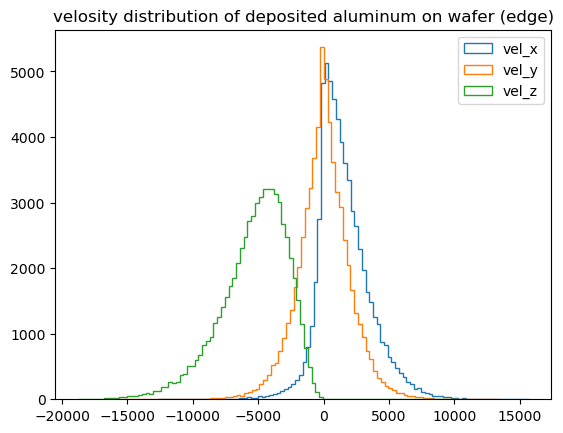

In [22]:
fig, ax = plt.subplots()
ax.set_title("velosity distribution of deposited aluminum on wafer (edge)")
ax.hist(edge_depo[:,3], bins=100,histtype='step', stacked=True, fill=False, label='vel_x')
ax.hist(edge_depo[:,4], bins=100,histtype='step', stacked=True, fill=False, label='vel_y')
ax.hist(edge_depo[:,5], bins=100,histtype='step', stacked=True, fill=False, label='vel_z')
# ax.set_yscale('log')
# ax.plot(X, hist_dist.cdf(X), label='CDF')
ax.legend()

In [23]:
for i in range(3):
    edge_depo = np.concatenate((edge_depo, edge_depo), axis=0)

print(edge_depo.shape)

(515192, 6)


In [24]:
logname = 'TS300'
test = depoSimulator_symmetry.depo(param = [1.6, -0.7], TS = 0.3, N = edge_depo.shape[0], sub_xy=[0,0], film=film, n=1, cellSize=[88, 88, 120], celllength=1, kdtreeN=5, tstep=1e-4, logname=logname)
deposit = test.run_afterCollision(1, 125, edge_depo[:, 3:], 0.5)

running:  62%|████████████████████████████████▊                    | 62.0/100 [03:48<02:19, 3.68s/B]


In [28]:
np.save('./TScompare/TS300_afterCollision_0530_v2_run1_t1e-5_p4e6_edge', deposit)

In [25]:
depo1 = torch.Tensor(deposit[20:46, 20:68, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:46, 20:68, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x2181c2bdc90_3&reconnect=auto" class="pyvis…

In [34]:
depo1 = torch.Tensor(deposit[20:68, 20:46, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[20:68, 20:48, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.camera_position = 'xz'
p.camera.azimuth = 180
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x21838845ad0_11&reconnect=auto" class="pyvi…

In [27]:
depo1 = torch.Tensor(deposit[:, :, :]==20).to_sparse()
depo1 = depo1.indices().numpy().T

# depo2 = torch.Tensor(deposit[:100, :, :]==40).to_sparse()
# depo2 = depo2.indices().numpy().T

# depo3 = torch.Tensor(np.logical_or( deposit[:100, :, :]==60, deposit[:100, :, :]==80)).to_sparse()
# depo3 = depo3.indices().numpy().T

substrute = torch.Tensor(deposit[:, :, :]==10).to_sparse()
substrute = substrute.indices().numpy().T
# point_cloud = pv.PolyData(points)
# point_cloud.plot(eye_dome_lighting=True)

p = pv.Plotter() 
p.add_mesh(depo1, color='red', point_size=10)
# p.add_mesh(depo2, color='green', point_size=5)
# p.add_mesh(depo3, color='yellow', point_size=5)
p.add_mesh(substrute, color='lightblue', point_size=10)
p.enable_eye_dome_lighting()
p.show()

l:\program\Lib\site-packages\pyvista\core\utilities\points.py:52: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


Widget(value='<iframe src="http://localhost:50258/index.html?ui=P_0x218375ba4d0_5&reconnect=auto" class="pyvis…